## Absolute and Relative Error

In [1]:
import numpy as np

# stirlings approx. to a factorial for 1 <= n <= 15

def stirling(n):
    term1 = np.sqrt(2*n*np.pi)
    term2 = np.power(n/np.e,n)
    
    return term1*term2

In [2]:
print(stirling(6))

710.078184642185


In [3]:
import math

abs_errors = []
rel_errors = []

for n in range(1,16):

    # compute and store absolute errors - | approx. - true |
    abs_err = abs(stirling(n) - math.factorial(n))
    abs_errors.append(abs_err)

    # compute and store relative errors = abs. error/true * 100
    rel_err = (abs_err/math.factorial(n)) * 100
    rel_errors.append(rel_err)

Matplotlib is building the font cache; this may take a moment.


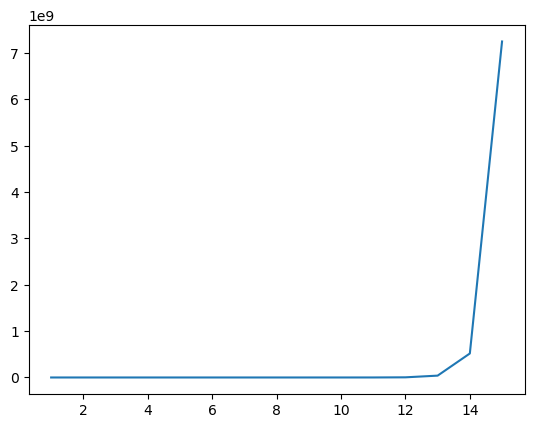

In [4]:
# plot absolute errors...they grow
import matplotlib.pyplot as plt

x_values = [n for n in range(1,16)]

plt.plot(x_values,abs_errors)

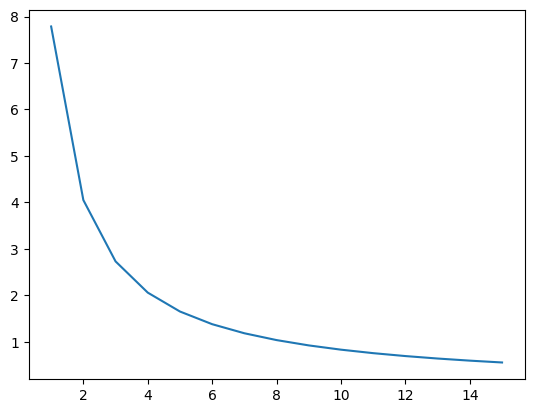

In [39]:
# plot relative errors...they shrink
plt.plot(x_values,rel_errors)

## Underflow amd Overflow (normalized fpns)

In [12]:
def underflow(b, L): # base, lowest exponent
    return np.power(b,L)

def overflow(b, p, U): # base, precision, largest exponent
    term1 = 1 - np.power(b,-1*p)
    term2 = np.power(b,U+1)
    return term1*term2

In [13]:
underflow(10.0,-20)
overflow(10.0, 10, 20)

9.999999998999999e+20

## Machine Epsilon

In [14]:
# The smallest number you can add to another number (on a given computer) to get a new number
# ie the smallest number a compuuter can recognize


# It is the upper bound on the relative error due to ROUNDING in fpn arithmetic

In [15]:
def machine_epsilon(rounding, b, p): # rounding type, base, precision

    if rounding == "truncate":
        return np.power(b,1-p)
    else: # nearest
        return 0.5 *  np.power(b,1-p)

In [17]:
machine_epsilon("truncate", 10, 10.0)

1e-09

## Least Squares Fit

In [4]:
points = [(0.0, 2.9),(0.5, 2.7),(1.0, 4.8),(1.5, 5.3),(2.0, 7.1),(2.5, 7.6),(3.0, 7.7),(3.5, 7.6),(4.0, 9.4),(4.5, 9.0),(5.0, 9.6),(5.5, 10.0),(6.0, 10.2)]

In [5]:
x_data = np.array([n[0] for n in points])
y_data = np.array([n[1] for n in points])

In [6]:
# FIRST rewrite the line equation as y = Ap where A = [[x,1]] and p =[[m],[c]]
A = np.vstack([x_data, np.ones(len(x_data))]).T

In [7]:
#  using x = (A.T * A)^-1 * A.T * b ... the analytical solution
np.matmul(np.matmul(np.linalg.inv(np.matmul(A.T,A)),A.T),y_data)

array([1.26593407, 3.42527473])

In [19]:
# using built in numpy.. can also get residuals and more
m, c = np.linalg.lstsq(A, y_data)[0]

C:\Users\simon\AppData\Local\Temp\ipykernel_4768\741989433.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m, c = np.linalg.lstsq(A, y_data)[0]


In [20]:
m,c

(1.2659340659340663, 3.4252747252747233)

In [25]:
lsquares = np.linalg.lstsq(A, y_data)

C:\Users\simon\AppData\Local\Temp\ipykernel_4768\402600116.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  lsquares = np.linalg.lstsq(A, y_data)


## Root Finding Algorithms

Other methods exist too like Brendt's and the best can depend on the problem

In [27]:
def f(x):
    return x**3 - 2*x - 5

def df(x):
    return 3*x**2 - 2

In [32]:
f(3)

16

In [29]:
f(-2)

-9

### Interval Bisection Method

In [39]:
# start with initial bracket {L,U} such that sign f(L) not equal sign f(U)
# check at the midpoint and cut range in half

def bisection_method(func, l, u, tolerance=1e-6, max_iterations=100):

    for i in range(max_iterations):
        midpoint = (l+u)/2

        # have we found the root?
        if func(midpoint) == 0:
            return midpoint

        # check for interval size "tolerance"...range is smaller enough to accept
        if (u - l)/2.0 < tolerance:
            return midpoint


        # check where the root is using signs, bisect the range
        if func(midpoint) * func(l) < 0:
            u = midpoint
        else:
            l = midpoint

    print(f"Error: Maximum number of iterations ({max_iterations}) reached without finding a root to the desired tolerance.")
    return None

In [38]:
bisection_method(f, -2, 3)

2.094551205635071

In [36]:
f(2.094551205635071)

-3.07952117495347e-06

### Newton's Method

In [40]:
# an iterative method that uses a formula to update an initial guess using the derivative
# x(i+1) = x(i) - f(x(i))/df(x(i))

def newtons_method(f, df, x0, tolerance=1e-6, max_iterations=100):

    x = x0
    for i in range(max_iterations):

        fx = f(x)
        dfx = df(x)
        
        # Avoid division by zero
        if abs(dfx) < 1e-10: 
            print("Derivative too small, stopping.")
            return None
            
        # Newtons formula update  
        x_new = x - fx / dfx

        # check if acceptable
        if abs(x_new - x) < tolerance:
            return x_new, i+1 # Return root and iterations
            
        x = x_new
    return x, max_iter # Return best guess if max_iter reached

In [41]:
root, iterations = newtons_method(f, df, 2) # Start with guess x=2

In [42]:
root

2.0945514815423265

In [43]:
iterations

4

### Secant Method

In [44]:
# similar to Newtons but uses a finite difference approx. instead of the exact derivative (not implementing, just follow Newtons)

### Using Scipy

In [45]:
# scipy optimize is the goto for root finding, it will auto select best algorithm or you can tell it to use one

In [5]:
from scipy.optimize import root_scalar

## Solving First Order ODE's

### Euler's Method

In [1]:
# Updates an initial value using a formula in steps
# Works because we can define a function that retruns a derivative, then we are stepping in direction of gradient

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the ODE dy/dx = f(x, y)
def f(x, y):
    return x + y  # Example: dy/dx = x + y

# Euler's method parameters
x0 = 0      # Initial x
y0 = 1      # Initial y
xn = 2      # End x
h = 0.1     # Step size
steps = int((xn - x0) / h)

# Initialize arrays
x = np.linspace(x0, xn, steps + 1)
y = np.zeros(steps + 1)
y[0] = y0

# Euler's method iteration
for i in range(steps):
    y[i+1] = y[i] + h * f(x[i], y[i])

# Plot results
plt.plot(x, y, 'bo-', label='Euler Method')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Euler\'s Method')
plt.grid(True)
plt.show()

ImportError: DLL load failed while importing _multiarray_umath: The specified module could not be found.

ImportError: numpy.core.multiarray failed to import